This notebook demonstrates some of the capabilities of the eegyolk library.

# Currently under rewrite

#### Imports

In [1]:
import mne      # toolbox for analyzing and visualizing EEG data
import os       # using operating system dependent functionality (folders)
import pandas   # data analysis and manipulation
import numpy    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
import glob
import numpy as np
from numpy.fft import fft, fftfreq
from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

from mne.time_frequency.tfr import morlet
from mne.viz import plot_filter, plot_ideal_filter


from IPython.display import clear_output
import warnings

import sys

Below eegyolk is importted in it's most updated version
But the cell could be replaced by importing the stable library and then importing the modules of it.

In [3]:
sys.path.append('C:/Projects/eegyolk')
import eegyolk
from eegyolk import helper_functions

#### Load EEG files
Change eeg_file_root to path where the Dataset is located. Note for running on different files change eeg_file_root

In [ ]:
# eeg_file_root = "C:/Projects/new_data_karin_EEG/not_zip/"

In [22]:
eeg_file_root = input()

y


Note we assume you are looking at bdf files

In [4]:
eeg_list = []
eeg_filenames = []
eeg_filelocation = []



pattern = os.path.join(eeg_file_root, '**/*.bdf')

files = glob.glob(pattern, recursive=True)

for file in files:
    if file.endswith('.bdf'):  # and len(file) == 8:
        BdfFile = mne.io.read_raw_bdf(file)
        eeg_list.append(BdfFile)
        eeg_filenames.append(file.replace(".bdf", ""))
        eeg_filelocation.append(file)
        clear_output(wait=True)
print(len(eeg_list), "EEG files loaded")

0 EEG files loaded


In [ ]:
### Make a synthetic EEG like array

In [6]:


sfreq = 1000. # signal collection frequency?
f_p = 40. # this is the stop freuqency, above which we should 0
flim = (1., sfreq / 2.)  # limits for plotting

In [7]:
# make something to filter
dur = 10.
center = 2.
morlet_freq = f_p
tlim = [center - 0.2, center + 0.2]
tticks = [tlim[0], center, tlim[1]]
flim = [20, 70]

x = np.zeros(int(sfreq * dur) + 1)
blip = morlet(sfreq, [morlet_freq], n_cycles=7)[0].imag / 20.
n_onset = int(center * sfreq) - len(blip) // 2
x[n_onset:n_onset + len(blip)] += blip
x_orig = x.copy()

rng = np.random.RandomState(0)
x += rng.randn(len(x)) / 1000.
x += np.sin(2. * np.pi * 60. * np.arange(len(x)) / sfreq) / 2000.

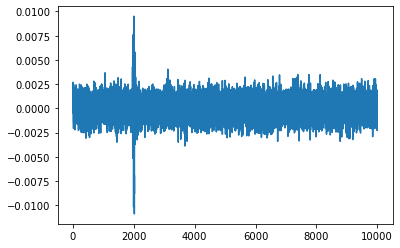

In [8]:
plt.plot(x)

In [10]:


sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis_raw.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file)
# use just 60 seconds of data and mag channels, to save memory
raw.crop(0, 60).pick_types(meg='mag', stim=True).load_data()

100%|#####################################| 1.65G/1.65G [00:00<00:00, 2.13TB/s]
Untarring contents of 'C:\Users\makeda\mne_data\MNE-sample-data-processed.tar.gz' to 'C:\Users\makeda\mne_data'


Opening raw data file C:\Users\makeda\mne_data\MNE-sample-data\MEG\sample\sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 36037  =      0.000 ...    60.000 secs...


<Raw | sample_audvis_raw.fif, 111 x 36038 (60.0 s), ~33.6 MB, data loaded>

Using matplotlib as 2D backend.
Opening raw-browser...


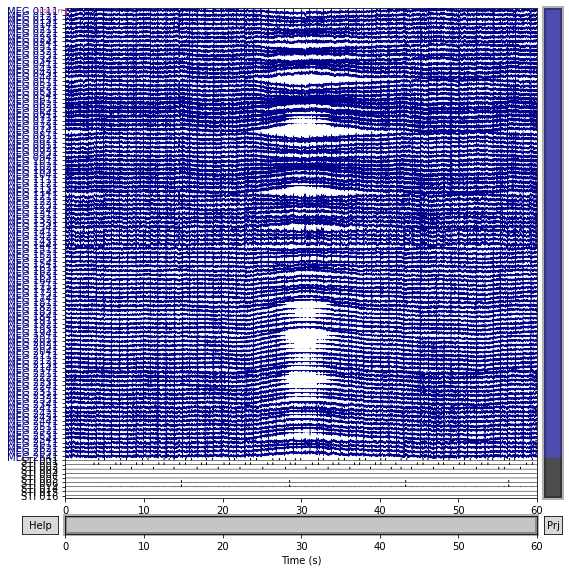

In [11]:
with mne.viz._figure.use_browser_backend('matplotlib'):
        fig = raw.plot(duration=60, proj=False,
                                n_channels=len(raw.ch_names), remove_dc=False)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.2 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Filter length: 9911 samples (16.501 sec)

Opening raw-browser...


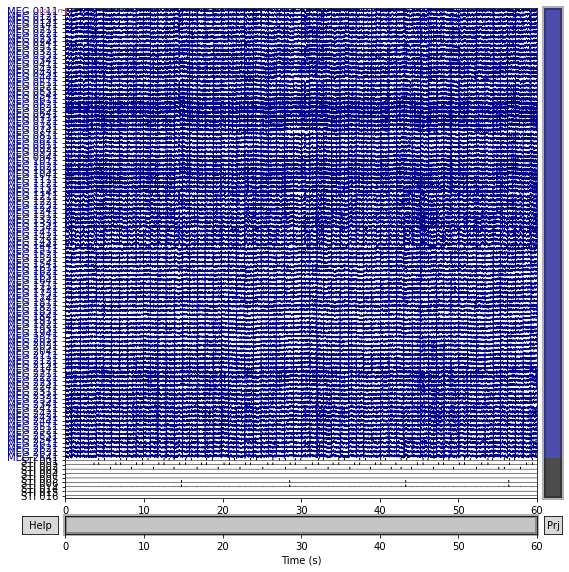

Text(0.5, 0.98, 'High-pass filtered at 0.2 Hz')

In [12]:
#for cutoff in (0.1, 0.2):
cutoff = 0.2
raw_highpass = raw.copy().filter(l_freq=cutoff, h_freq=None)
with mne.viz._figure.use_browser_backend('matplotlib'):
    fig = raw_highpass.plot(duration=60, proj=False,
                            n_channels=len(raw.ch_names), remove_dc=False)
fig.subplots_adjust(top=0.9)
fig.suptitle('High-pass filtered at {} Hz'.format(cutoff), size='xx-large',
             weight='bold')

In [13]:
raw_simple_filtered = helper_functions.band_pass_filter(raw, 0.2, 5)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 5.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Filter length: 9911 samples (16.501 sec)



In [14]:
raw_simple_filtered.ch_names

['MEG 0111',
 'MEG 0121',
 'MEG 0131',
 'MEG 0141',
 'MEG 0211',
 'MEG 0221',
 'MEG 0231',
 'MEG 0241',
 'MEG 0311',
 'MEG 0321',
 'MEG 0331',
 'MEG 0341',
 'MEG 0411',
 'MEG 0421',
 'MEG 0431',
 'MEG 0441',
 'MEG 0511',
 'MEG 0521',
 'MEG 0531',
 'MEG 0541',
 'MEG 0611',
 'MEG 0621',
 'MEG 0631',
 'MEG 0641',
 'MEG 0711',
 'MEG 0721',
 'MEG 0731',
 'MEG 0741',
 'MEG 0811',
 'MEG 0821',
 'MEG 0911',
 'MEG 0921',
 'MEG 0931',
 'MEG 0941',
 'MEG 1011',
 'MEG 1021',
 'MEG 1031',
 'MEG 1041',
 'MEG 1111',
 'MEG 1121',
 'MEG 1131',
 'MEG 1141',
 'MEG 1211',
 'MEG 1221',
 'MEG 1231',
 'MEG 1241',
 'MEG 1311',
 'MEG 1321',
 'MEG 1331',
 'MEG 1341',
 'MEG 1411',
 'MEG 1421',
 'MEG 1431',
 'MEG 1441',
 'MEG 1511',
 'MEG 1521',
 'MEG 1531',
 'MEG 1541',
 'MEG 1611',
 'MEG 1621',
 'MEG 1631',
 'MEG 1641',
 'MEG 1711',
 'MEG 1721',
 'MEG 1731',
 'MEG 1741',
 'MEG 1811',
 'MEG 1821',
 'MEG 1831',
 'MEG 1841',
 'MEG 1911',
 'MEG 1921',
 'MEG 1931',
 'MEG 1941',
 'MEG 2011',
 'MEG 2021',
 'MEG 2031',

In [15]:
help(raw_simple_filtered)

Help on Raw in module mne.io.fiff.raw object:

class Raw(mne.io.base.BaseRaw)
 |  Raw(fname, allow_maxshield=False, preload=False, on_split_missing='raise', verbose=None)
 |  
 |  Raw data in FIF format.
 |  
 |  Parameters
 |  ----------
 |  fname : str | file-like
 |      The raw filename to load. For files that have automatically been split,
 |      the split part will be automatically loaded. Filenames not ending with
 |      ``raw.fif``, ``raw_sss.fif``, ``raw_tsss.fif``, ``_meg.fif``,
 |      ``_eeg.fif``,  or ``_ieeg.fif`` (with or without an optional additional
 |      ``.gz`` extension) will generate a warning. If a file-like object is
 |      provided, preloading must be used.
 |  
 |      .. versionchanged:: 0.18
 |         Support for file-like objects.
 |  allow_maxshield : bool | str (default False)
 |      If True, allow loading of data that has been recorded with internal
 |      active compensation (MaxShield). Data recorded with MaxShield should
 |      generally not 

In [16]:
raw_makeda_filtered.info['lowpass']

5.0

In [17]:
vars(raw_simple_filtered)

{'preload': True,
 '_last_samps': array([61837]),
 '_first_samps': array([25800]),
 'info': <Info | 20 non-empty values
  acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
  bads: []
  ch_names: MEG 0111, MEG 0121, MEG 0131, MEG 0141, MEG 0211, MEG 0221, MEG ...
  chs: 102 Magnetometers, 9 Stimulus
  custom_ref_applied: False
  description: acquisition (megacq) VectorView system at NMR-MGH
  dev_head_t: MEG device -> head transform
  dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
  events: 1 item (list)
  experimenter: MEG
  file_id: 4 items (dict)
  highpass: 0.2 Hz
  hpi_meas: 1 item (list)
  hpi_results: 1 item (list)
  lowpass: 5.0 Hz
  meas_date: 2002-12-03 19:01:10 UTC
  meas_id: 4 items (dict)
  nchan: 111
  proj_id: 1 item (ndarray)
  proj_name: test
  projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
  sfreq: 600.6 Hz
 >,
 'buffer_size_sec': 0.9989760657919393,
 '_cals': array([1.26342778e-14, 1.26342778e-14, 1.26342778e-14, 1.26342778e-14,
       

In [18]:
print(type(raw.info['lowpass']))

<class 'float'>


In [ ]:
## Need to rewrite data path

In [23]:
sample_eeg = 'demo_files/640-464-17m-jc-mmn36.cnt'

In [24]:
sample_eeg_read = mne.io.read_raw_cnt(sample_eeg, preload=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Projects\\eegyolk\\demos\\demo_files\\640-464-17m-jc-mmn36.cnt'

In [19]:
sample_eeg_filtered = helper_functions.band_pass_filter(sample_eeg_read, 0, 2.38540286e-05)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 2.4e-05 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 0.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 1.00 Hz)
- Filter length: 825 samples (1.650 sec)

